In [266]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
import scipy as sp

In [267]:
def reduce(x, col_name):
  x[col_name] = x[col_name] / x[col_name].max()

def remove_outliers(df):
  return df[(np.abs(zscore(df)) < 3).all(axis=1)]

In [268]:
df_train = pd.read_csv('../data/house-prices/train.csv')
df_test = pd.read_csv('../data/house-prices/test.csv')

In [270]:
columns = [
  # 'Id',
  'MSSubClass',  # Certaines catégories sont dans une marge de prix très précise
  # 'MSZoning',  # Il y a un pattern mais probablement inutile parce que mal réparti
  # 'LotFrontage',  # Contient des NA
  'LotArea', # Corrélation confirmée visuellement après supression des outliers
  # 'Street',  # Mal répartie : inutilisable
  # 'Alley', # Prseque toujours NaN : inutilisable
  # 'LotShape',  # Pas de corrélation flagrante
  # 'LandContour',  # Données mal réparties, pas de corrélation flagrante
  # 'Utilities',  # Toujours la même valeur (sauf 1)
  # 'LotConfig',  # Pas de corrélation flagrante
  # 'LandSlope',  # Données mal réparties, pas de corrélation flagrante
  'Neighborhood',  # Pattern très apparent
  'Condition1',  # Pattern légèrement visible, potenetillement dû à la répartition déséquilibrée
  # 'Condition2',  # Données mal réparties
  'BldgType',  # Pattern légèrement visible, potenetillement dû à la répartition déséquilibrée
  'HouseStyle',  #  Seuil minimum pour les two-stories
  'OverallQual',  # Très corrélé linéarinement
  'OverallCond',  # Pattern très visible, calcul faussé par qualité 5
  'YearBuilt',  # Forte corrélation calculée et visible
  # 'YearRemodAdd',  # Probablement duplicata de la colonne précédente -> new feature has_been_renoved
  # 'RoofStyle',  # Pas de pattern pour les valeurs suffisament fréquentes
  # 'RoofMatl',  # Données mal réparties
  # 'Exterior1st',  # Pas de pattern
  # 'Exterior2nd',  # Pas de pattern clair -> new feature : has_two_exterior
  'MasVnrType',  # Prix minimum pour certaines valeurs
  'MasVnrArea', # Prix minimum pour certaines valeurs
  'ExterQual',  # Pattern clair
  'ExterCond',  #  Pattern clair
  'Foundation',  # CBlock is slightly more expensive
  'BsmtQual',  # Clair corrélation
  'BsmtCond',  # Clair corrélation potentiellement biaisée par la mauvaise répartition, null
  'BsmtExposure',  # Léger impact, null
  'BsmtFinType1',  # Léger impact, null
  'BsmtFinSF1',  # Corrélation très visible
  # 'BsmtFinType2',  # Mal réparti
  # 'BsmtFinSF2',  # Mal réparti
  'BsmtUnfSF',  # Légère corrélation
  'TotalBsmtSF',  # Corrélation très importante
  # 'Heating',  # Inexploitable
  # 'HeatingQC',  # Pas de corrélation
  # 'CentralAir',  # Mal réparti
  # 'Electrical',
  '1stFlrSF',  # Très corrélé : duplicata de TotalBsmtSF
  '2ndFlrSF', # Très corrélé : duplicata de TotalBsmtSF
  'LowQualFinSF',
  # 'GrLivArea',  # Données mal réparties, à confirmer
  'BsmtFullBath',  # Corrélation calculée mais pas confirmée visuellement
  # 'BsmtHalfBath',  # Pas de corrélation
  'FullBath',  # Légère corrélation
  # 'HalfBath',  # Pas de corrélation claire
  'BedroomAbvGr',  # Légère corrélation
  # 'KitchenAbvGr',  # Mal répartie
  'KitchenQual',  # Clair corrélation
  'TotRmsAbvGrd',  # Clair corrélation
  # 'Functional',  # Données mal répartie
  'Fireplaces',  # Clair corrélation
  'FireplaceQu',  # Corrélation notament entre NA et non NA : feature engineering
  'GarageType',  # Corrélation très légère
  'GarageYrBlt',  # Clair corrélation
  'GarageFinish',  # Clair corrélation
  'GarageCars',  # Clair corrélation calculée est visible
  'GarageArea',  # Clair corrélation calculée est visible, probable ducplicata du précedent
  # 'GarageQual',  # Données mal réparties
  # 'GarageCond',  # Données mal réparties
  # 'PavedDrive',  # Données mal réparties
  'WoodDeckSF',  # Clair corrélation
  'OpenPorchSF',  # Clair corrélation
  # 'EnclosedPorch',  # Pas de corrélation
  # '3SsnPorch',  # Données mal réparties
  # 'ScreenPorch',  # Données mal réparties
  # 'PoolArea',  # Données mal réparties
  # 'PoolQC',  # Trop de NA
  # 'Fence',  # Trop de NA
  # 'MiscFeature',  # Trop de NA
  # 'MiscVal',  # Données mal réparties
  # 'MoSold',  # Pas de corrélation
  # 'YrSold',  # Pas de corrélation
  'SaleType',  # Légère corrélation probablement biaisée par la répartition
  'SaleCondition',  # Légère corrélation probablement biaisée par la répartition
  # 'SalePrice',
]

col = 'SaleCondition'
df_scatter = df_train[['SalePrice', col]]
df_scatter[col].value_counts()
print(columns)

['MSSubClass', 'LotArea', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SaleType', 'SaleCondition']


In [259]:
df_scatter[col].isna().value_counts()

False    1460
Name: SaleCondition, dtype: int64

In [235]:
df_scatter = remove_outliers(df_scatter)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [245]:
df_scatter.corr()['SalePrice'].sort_values(ascending=False)[1]

0.04643224522381936

In [260]:
df_scatter[col] = pd.factorize(df_train[col])[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


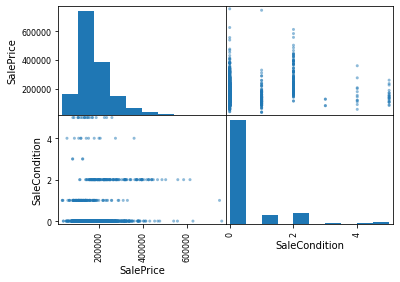

In [261]:
_=scatter_matrix(df_scatter, alpha=0.5)

In [262]:
df_scatter[col].value_counts()

0    1198
2     125
1     101
5      20
4      12
3       4
Name: SaleCondition, dtype: int64

In [271]:
x_train = df_train[columns]
y_train = df_train[['SalePrice']]

In [272]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

ValueError: could not convert string to float: 'CollgCr'

In [ ]:
y_train_pred = model.predict(x_train)

In [ ]:
accuracy_score(y_train, y_train_pred)